## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Reading the Data

In [2]:
train=pd.read_csv('train_BRCpofr.csv')
test=pd.read_csv('test_koRSKBP.csv')


In [3]:
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [5]:
train.shape, test.shape

((89392, 12), (59595, 11))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [7]:
train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [8]:
train.drop('id',axis =1, inplace=True)

In [9]:
train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [10]:
train.nunique()

gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

## EDA

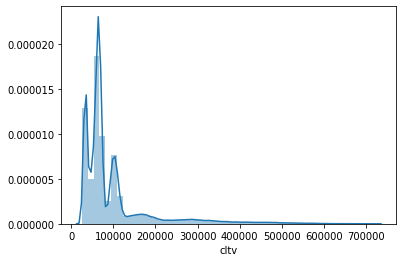

In [11]:
sns.distplot(train["cltv"])
plt.show()

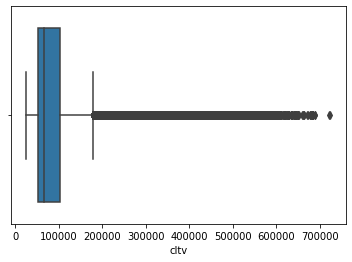

In [12]:
sns.boxplot(train["cltv"])
plt.show()

In [13]:
train["cltv"].skew()

2.7530651590601143

From the distribution and box plot we can infer that CLV is skewed. There are outliers in our dependent variable but we cant treat them directly because they are influential points.

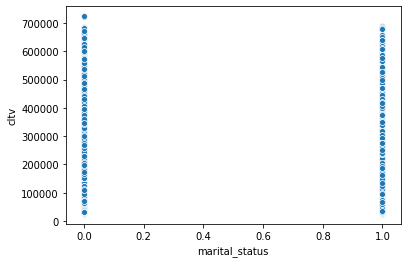

In [14]:
sns.scatterplot(train["marital_status"],train["cltv"])
plt.show()

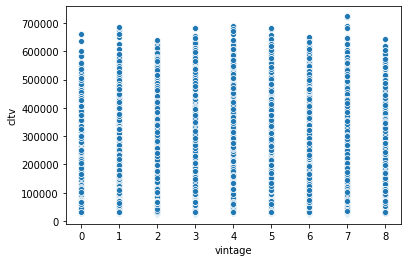

In [15]:
sns.scatterplot(train["vintage"],train["cltv"])
plt.show()

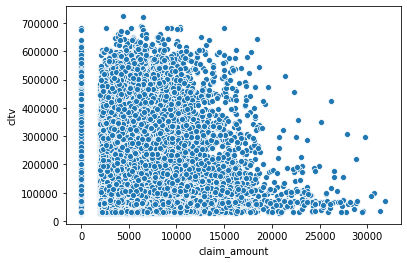

In [16]:
sns.scatterplot(train["claim_amount"],train["cltv"])
plt.show()

In [17]:
cat_cols = train.select_dtypes(include="object")

In [18]:
cat_cols.head()

,gender,area,qualification,income,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
1,Male,Rural,High School,5L-10L,More than 1,A,Platinum
2,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
3,Female,Rural,High School,5L-10L,More than 1,A,Platinum
4,Male,Urban,High School,More than 10L,More than 1,A,Gold


In [19]:
cat_cols.columns

Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')

In [20]:
for i in cat_cols:
    print("Unique values in",str(i),"is",train[i].nunique())
    print(train[i].value_counts())
    print("-----------------------------------------")

Unique values in gender is 2
Male      50497
Female    38895
Name: gender, dtype: int64
-----------------------------------------
Unique values in area is 2
Urban    62455
Rural    26937
Name: area, dtype: int64
-----------------------------------------
Unique values in qualification is 3
High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64
-----------------------------------------
Unique values in income is 4
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64
-----------------------------------------
Unique values in num_policies is 2
More than 1    60263
1              29129
Name: num_policies, dtype: int64
-----------------------------------------
Unique values in policy is 3
A    56644
B    24635
C     8113
Name: policy, dtype: int64
-----------------------------------------
Unique values in type_of_policy is 3
Platinum    47796
Silver      21010
Gold        20586
Name: t

In [21]:
for i in train:
    print("Unique values in",str(i),"is",train[i].nunique())
    print(train[i].value_counts())
    print("-----------------------------------------")

Unique values in gender is 2
Male      50497
Female    38895
Name: gender, dtype: int64
-----------------------------------------
Unique values in area is 2
Urban    62455
Rural    26937
Name: area, dtype: int64
-----------------------------------------
Unique values in qualification is 3
High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64
-----------------------------------------
Unique values in income is 4
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64
-----------------------------------------
Unique values in marital_status is 2
1    51444
0    37948
Name: marital_status, dtype: int64
-----------------------------------------
Unique values in vintage is 9
6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64
-----------------------------------------
Unique values in claim_amount is 10889
0      

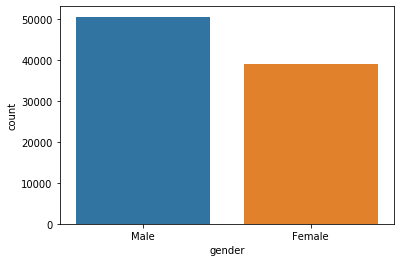

In [22]:
sns.countplot(train["gender"])
plt.show()

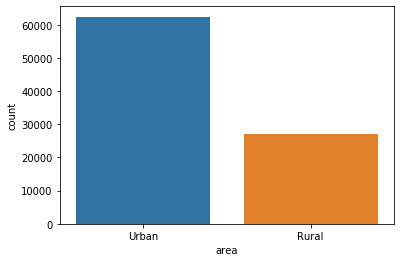

In [23]:
sns.countplot(train["area"])
plt.show()

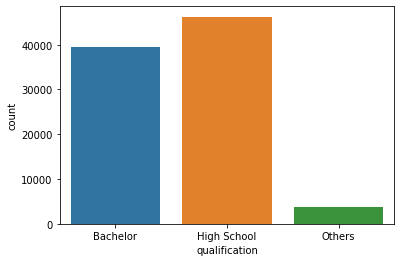

In [24]:
sns.countplot(train["qualification"])
plt.show()

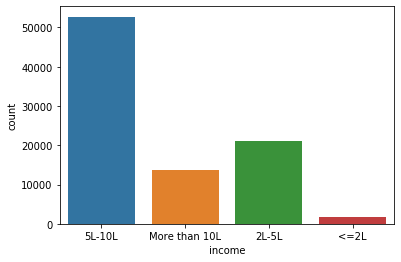

In [25]:
sns.countplot(train["income"])
plt.show()

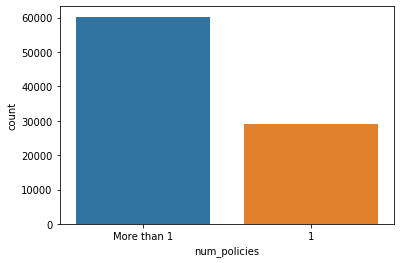

In [26]:
sns.countplot(train["num_policies"])
plt.show()

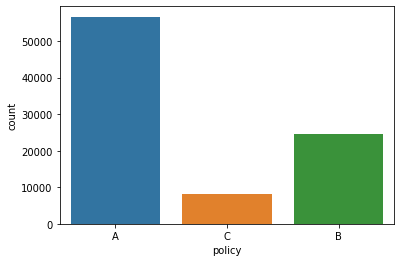

In [27]:
sns.countplot(train["policy"])
plt.show()

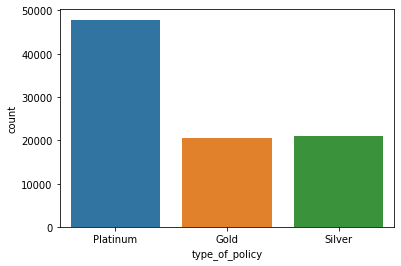

In [28]:
sns.countplot(train["type_of_policy"])
plt.show()

## Correlations

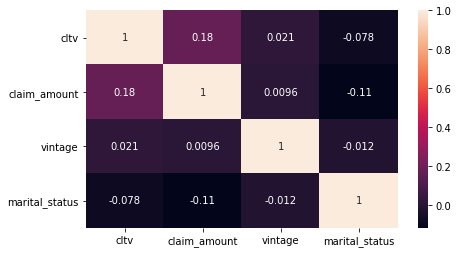

In [29]:
heatmap = train[['cltv', 'claim_amount', 'vintage','marital_status']]

plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

We can clearly see in the heatmap, that customer lifetime value has a better correlation with claim amount and acceptable correlation with vintage.

## Converting category data to numerical

In [30]:
from sklearn.preprocessing import OneHotEncoder
train = pd.get_dummies(train[['gender', 'area','qualification', 'income', 'marital_status', 'vintage', 'claim_amount','num_policies','policy','type_of_policy','cltv']])

In [31]:
train.head()

,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,5,5790,64308,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,8,5080,515400,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,1,8,2599,64212,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0
3,0,7,0,97920,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,1,6,3508,59736,0,1,0,1,0,1,...,0,1,0,1,1,0,0,1,0,0


In [32]:
corr = train.corr()
corr


,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
marital_status,1.000000,-0.011686,-0.114924,-0.077744,-0.070468,0.070468,0.048739,-0.048739,0.015744,-0.016921,...,-0.009521,-0.008394,0.082363,-0.082363,0.029833,-0.042759,0.016472,0.014407,-0.015609,0.004057
vintage,-0.011686,1.000000,0.009579,0.020608,-0.005827,0.005827,-0.001145,0.001145,0.027646,-0.023877,...,0.005197,-0.003478,-0.050699,0.050699,-0.073758,0.094780,-0.023712,-0.001513,-0.009788,0.013016
claim_amount,-0.114924,0.009579,1.000000,0.180344,-0.049773,0.049773,-0.451054,0.451054,-0.046636,0.061432,...,0.076035,-0.122582,-0.155281,0.155281,0.148427,-0.163355,0.005137,0.013483,0.007126,-0.021770
cltv,-0.077744,0.020608,0.180344,1.000000,0.001318,-0.001318,-0.133107,0.133107,0.005511,0.013329,...,0.021668,-0.039879,-0.360414,0.360414,0.035181,-0.058261,0.031613,0.008627,0.021295,-0.033617
gender_Female,-0.070468,-0.005827,-0.049773,0.001318,1.000000,-1.000000,0.042516,-0.042516,-0.036120,0.034122,...,0.036624,0.012460,-0.052871,0.052871,0.007721,-0.003375,-0.007699,0.000745,-0.015893,0.017956
gender_Male,0.070468,0.005827,0.049773,-0.001318,-1.000000,1.000000,-0.042516,0.042516,0.036120,-0.034122,...,-0.036624,-0.012460,0.052871,-0.052871,-0.007721,0.003375,0.007699,-0.000745,0.015893,-0.017956
area_Rural,0.048739,-0.001145,-0.451054,-0.133107,0.042516,-0.042516,1.000000,-1.000000,0.042854,-0.059079,...,-0.093010,0.159729,0.121898,-0.121898,-0.154533,0.176116,-0.014745,-0.013568,-0.014939,0.031046
area_Urban,-0.048739,0.001145,0.451054,0.133107,-0.042516,0.042516,-1.000000,1.000000,-0.042854,0.059079,...,0.093010,-0.159729,-0.121898,0.121898,0.154533,-0.176116,0.014745,0.013568,0.014939,-0.031046
qualification_Bachelor,0.015744,0.027646,-0.046636,0.005511,-0.036120,0.036120,0.042854,-0.042854,1.000000,-0.919104,...,-0.010141,0.010687,-0.023337,0.023337,-0.053618,0.080095,-0.034650,-0.020399,-0.019506,0.043201
qualification_High School,-0.016921,-0.023877,0.061432,0.013329,0.034122,-0.034122,-0.059079,0.059079,-0.919104,1.000000,...,0.010027,-0.015993,-0.005870,0.005870,0.062829,-0.086125,0.028580,0.014081,0.034232,-0.054251


In [33]:
train.drop(['gender_Female','gender_Male','area_Rural','area_Urban'],axis =1, inplace=True)

In [34]:
train.head()

,marital_status,vintage,claim_amount,cltv,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,5,5790,64308,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,0,8,5080,515400,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,1,8,2599,64212,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
3,0,7,0,97920,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
4,1,6,3508,59736,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0


## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

X = train.drop('cltv' , axis = 1)
y = train['cltv']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [36]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (62574, 18)
The size of training output is (62574,)
**************************************************
The size of testing input is (26818, 18)
The size of testing output is (26818,)


## Model Building

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

### 1. Linear Regression

In [38]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.15096138053378116
R^2 score for test: 0.15155453461280088


In [39]:
y_pred = model.predict(X_test)

In [40]:
print('RMSE:',np.sqrt(mse(y_test,y_pred)))
print("MAE",mae(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 82630.31898189566
MAE 50880.673920990484
R-squared: 0.15155453461280088


### 2. Ridge

In [41]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [42]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [43]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute error: ",mae(y_test, y_test_pred))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  82635.91432440537
Mean absolute error:  50746.46201403003
R-squared:  0.15143962512746467


### 3. Dicision Tree

In [44]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [45]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [46]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute error: ", mae(y_train.values, y_train_pred))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  83650.58569975101
Mean absolute error:  51078.09884972902
R-squared:  0.15495175853103693


In [47]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute error: ", mae(y_test, y_test_pred))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  82484.40309282189
Mean absolute error:  50107.50004980168
R-squared:  0.15454840819312243


## Checking on test data

In [48]:
test.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
dtype: object

In [49]:
test.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [50]:
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [51]:
test.drop(['id','gender','area'],axis =1, inplace=True)

In [52]:
test.head()

,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [53]:
from sklearn.preprocessing import OneHotEncoder
test = pd.get_dummies(test[['qualification', 'income', 'marital_status', 'vintage', 'claim_amount','num_policies','policy','type_of_policy']])

In [54]:
test.head()

,marital_status,vintage,claim_amount,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,0,6,2134,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,0,4,4102,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
2,1,7,2925,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
3,1,2,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1
4,0,5,14059,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1


In [55]:
#y_pred_lr = lr.predict(test)
#y_test_ridge_pred = ridge_regressor.predict(test)

y_test_dt_pred = tree.predict(test)

#y_test_rf_pred = random_regressor.predict(test)

In [56]:
#test['cltv_lr'] = y_pred_lr
#test['cltv_ridge'] = y_test_ridge_pred

test['cltv'] = y_test_dt_pred

#test['cltv_rf'] = y_test_rf_pred

In [57]:
test

,marital_status,vintage,claim_amount,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,cltv
0,0,6,2134,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,93832.818760
1,0,4,4102,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,123379.171326
2,1,7,2925,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,93832.818760
3,1,2,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,93832.818760
4,0,5,14059,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,130315.148748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,1,6,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,46741.885756
59591,0,6,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,49514.318318
59592,1,4,3323,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,93832.818760
59593,0,1,2886,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,108083.633455


In [58]:
test.drop(['marital_status','vintage','claim_amount','qualification_Bachelor','qualification_High School','qualification_Others','income_2L-5L','income_5L-10L','income_<=2L','income_More than 10L','num_policies_1','num_policies_More than 1','policy_A','policy_B','policy_C','type_of_policy_Gold','type_of_policy_Platinum','type_of_policy_Silver'],axis =1, inplace=True)

In [59]:
test

,cltv
0,93832.818760
1,123379.171326
2,93832.818760
3,93832.818760
4,130315.148748
...,...
59590,46741.885756
59591,49514.318318
59592,93832.818760
59593,108083.633455


In [61]:
test.to_csv("predictions.csv")